In [5]:
from numpy import linalg as LA
import numpy as np
import math

In [6]:
n = 632
path = "Result/task2/spr_simulation_N_632_phi_0.17_a_5_U0_3e-20_k_0.bin"

def read_data(path):
    with open(path, "br") as bf:
        data = np.fromfile(bf, np.float64)
    return data


def get_Pos_Vel(data, n, t):
    a = (t - 1)*(4*n + 1)
    b = t*(4*n + 1)
    
    x1 = []
    y1 = []
    
    V_x = []
    V_y = []
    
    i = 0
    for d in range(a,b - 1):
        if (b - a - i)%4 == 0:
            x1.append(data[d])
        elif (b - a - i + 1)%4 == 0:
            y1.append(data[d])
        elif (b - a - i + 2)%4 == 0:
            V_x.append(data[d])
        else:
            V_y.append(data[d])
        i = i + 1
    
    return [x1, y1, V_x, V_y]

# Gradient (modif)

In [7]:
coef_lambda = 5e-07
U_0 = 3e-20
x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, 20)

def SumLabmdaWithVelocity(Va, Vb, a, coef_lambda):
    summ = 0.00
    
    for i in range(1,a):
        for k in range(1,a):
            summ = summ + i*coef_lambda*Va - k*coef_lambda*Vb
    return summ


def grad_in_radius(a, b):
    grad_x_r = 0
    grad_y_r = 0 

    yi = y[a] - y[b] + SumLabmdaWithVelocity(v_y[a], v_y[b], 5, coef_lambda)
    xi = x[a] - x[b] + SumLabmdaWithVelocity(v_x[a], v_x[b], 5, coef_lambda)
    abs_r = math.sqrt(xi**2 + yi**2)
    exp_r = math.exp(- abs_r / coef_lambda)
      
    grad_x_r = grad_x_r + ( - exp_r / abs_r ) * (coef_lambda + abs_r**4) / abs_r**8 * xi
    grad_y_r = grad_y_r + ( - exp_r / abs_r ) * (coef_lambda + abs_r**4) / abs_r**8 * yi
    grad_x_r = grad_x_r * U_0 / (n**2) 
    grad_y_r = grad_y_r * U_0 / (n**2)
    return [grad_x_r, grad_y_r]
    
t = 20

def grad(alfa, beta):
    x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, t)
    Xgrad_mod = grad_in_radius(alfa, beta)[0]
    Ygrad_mod = grad_in_radius(alfa, beta)[1]
    
    return [[Xgrad_mod], [Ygrad_mod]]

In [45]:
def matrix_inv(beta):
    Q = np.matrix([[v_y[beta], v_x[beta]], [-v_x[beta], v_y[beta]]]) /  (v_y[beta]*v_y[beta] + v_x[beta]* v_x[beta])
    #Q = Q /  (v_y[beta]*v_y[beta] + v_x[beta]* v_x[beta])
    Q_inv = np.matrix([[v_y[beta], -v_x[beta]], [v_x[beta], v_y[beta]]]) /  (v_y[beta]*v_y[beta] + v_x[beta]* v_x[beta])
    
    return Q_inv

In [46]:
def dif_rAB(alfa, beta):
    dif_rAB = np.array([[x[alfa] - x[beta]], [y[alfa] - y[beta]]])
    #print("Ra - Rb: \n", dif_rAB)
    return dif_rAB

In [47]:

#forse_from_a_to_b = np.array([[Xgrad_mod], [Ygrad_mod]])

#res_1 = np.dot(matrix_inv(alfa, beta), forse_from_a_to_b)
#print("\nResult f: \n", res_1)

#res_2 = np.dot(matrix_inv(alfa, beta), dif_rAB(alfa, beta))
#print("\nResult f: \n", res_2)

In [48]:
wigth = 1

def create_matrix(size):
    if size % 2 != 0:
        return
    matrix_force_field = np.zeros((size, size))
    return matrix_force_field

print("For example size = 50: \n", create_matrix(50))

For example size = 50: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


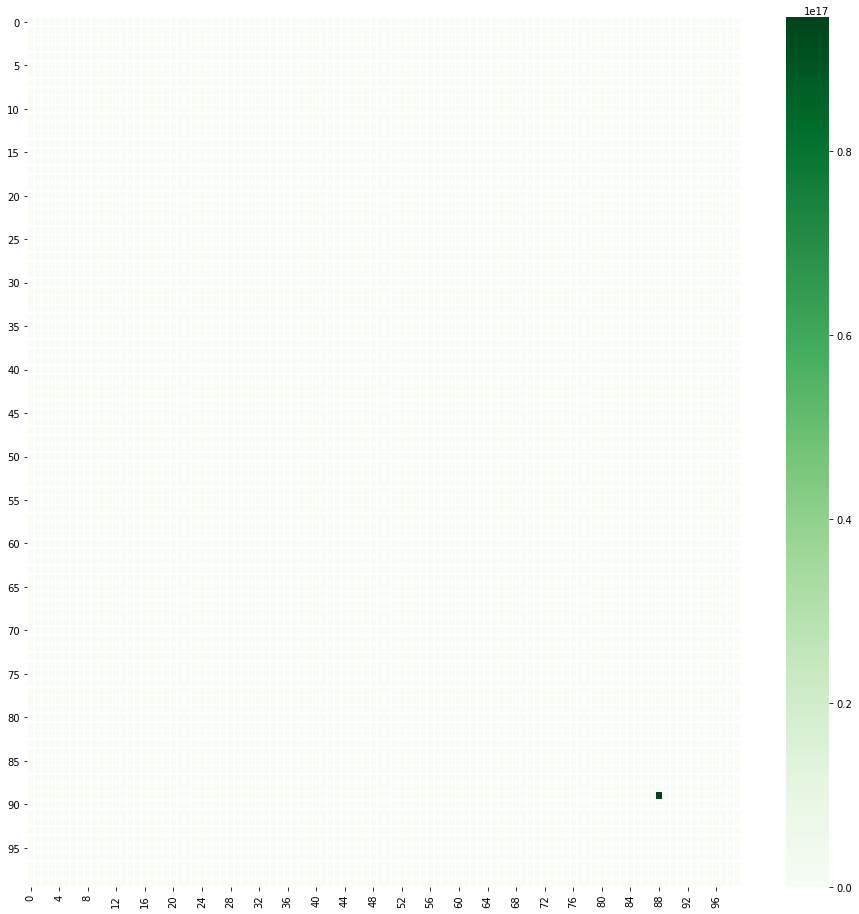

2  

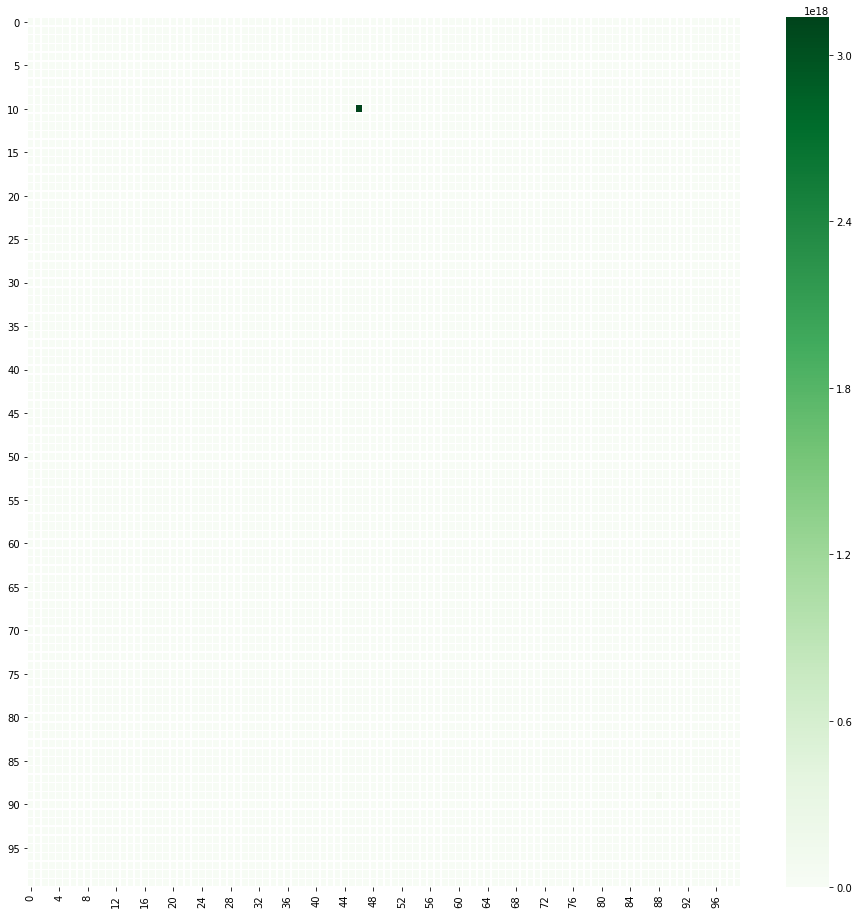

3  

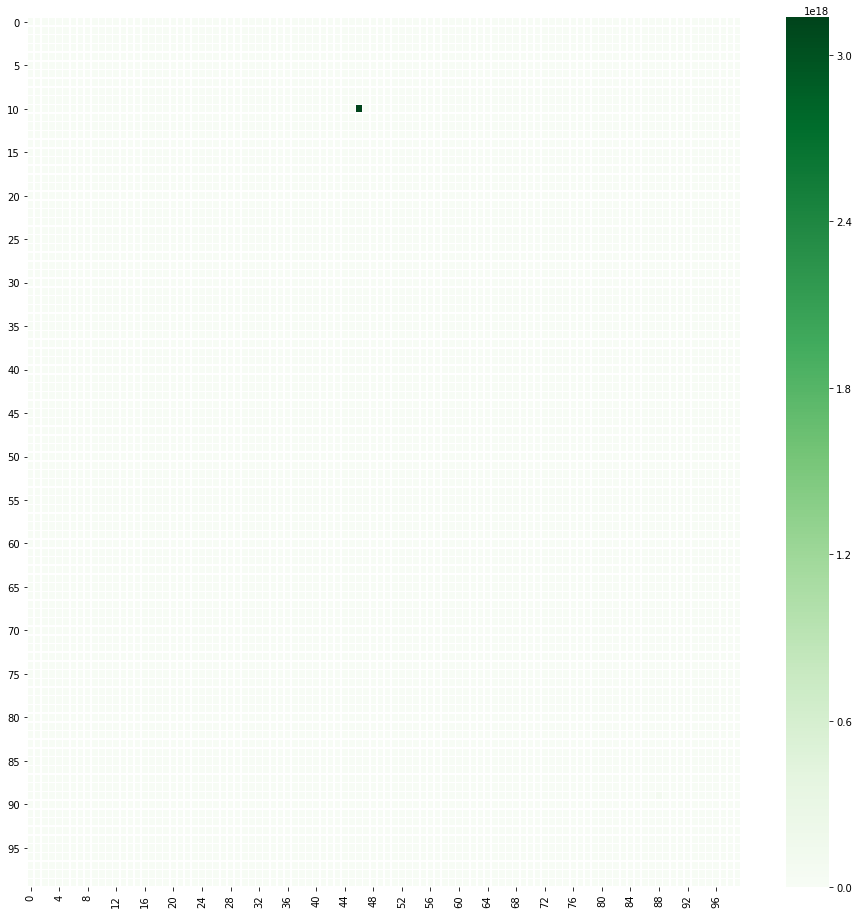

4  

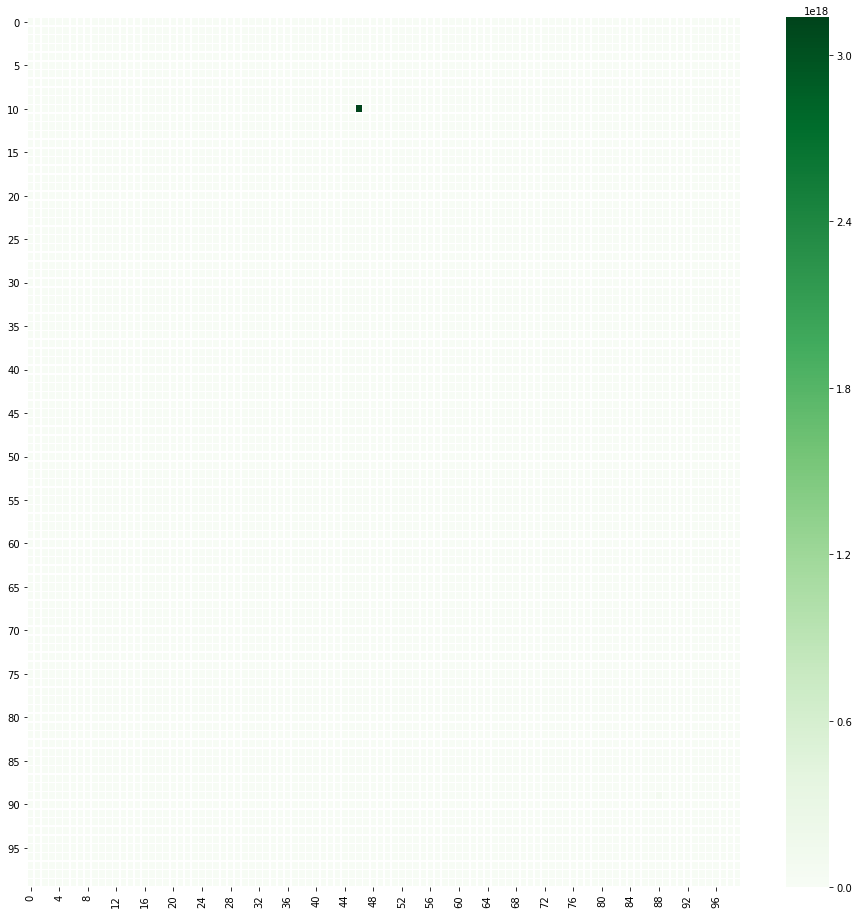

5  

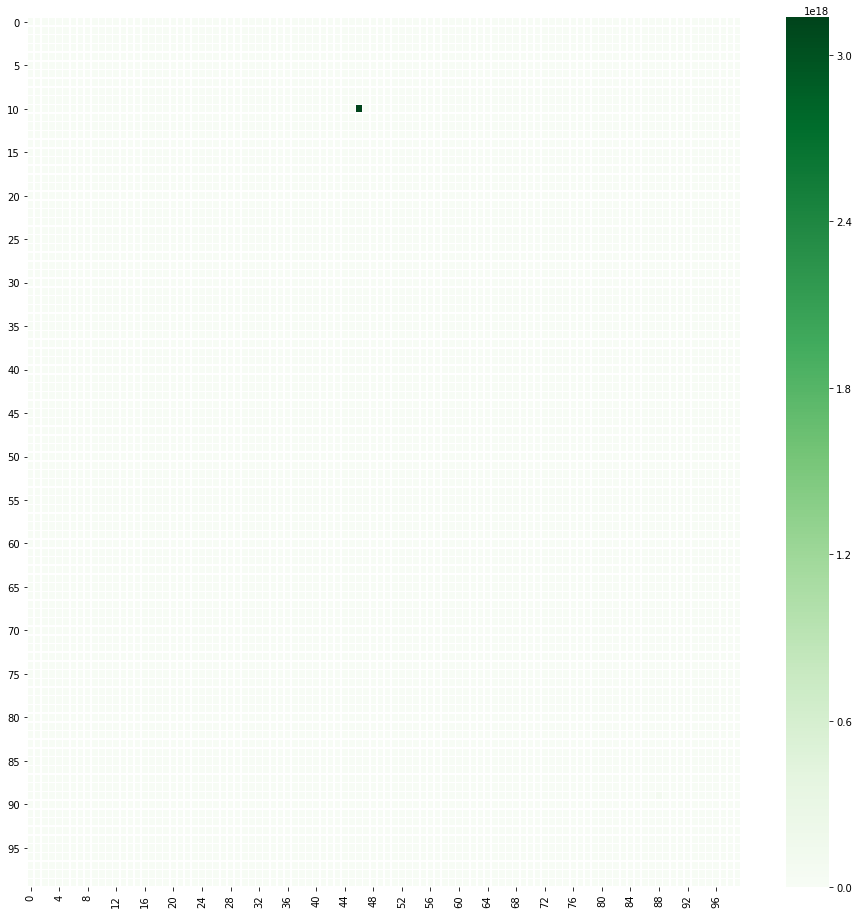

6  

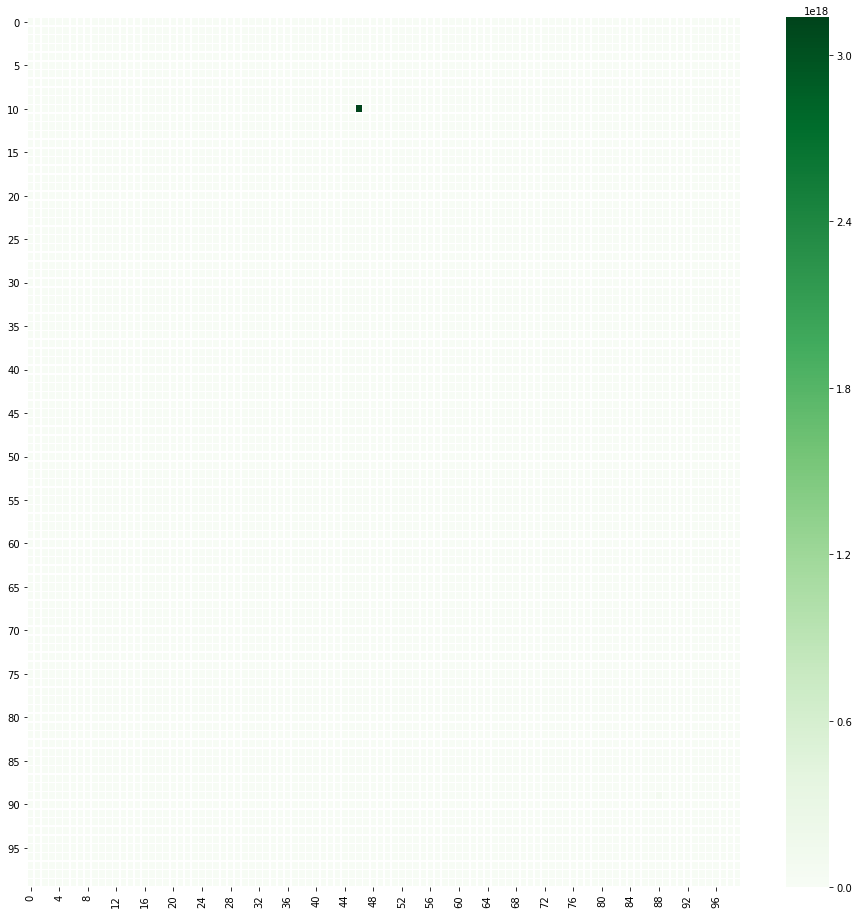

7  

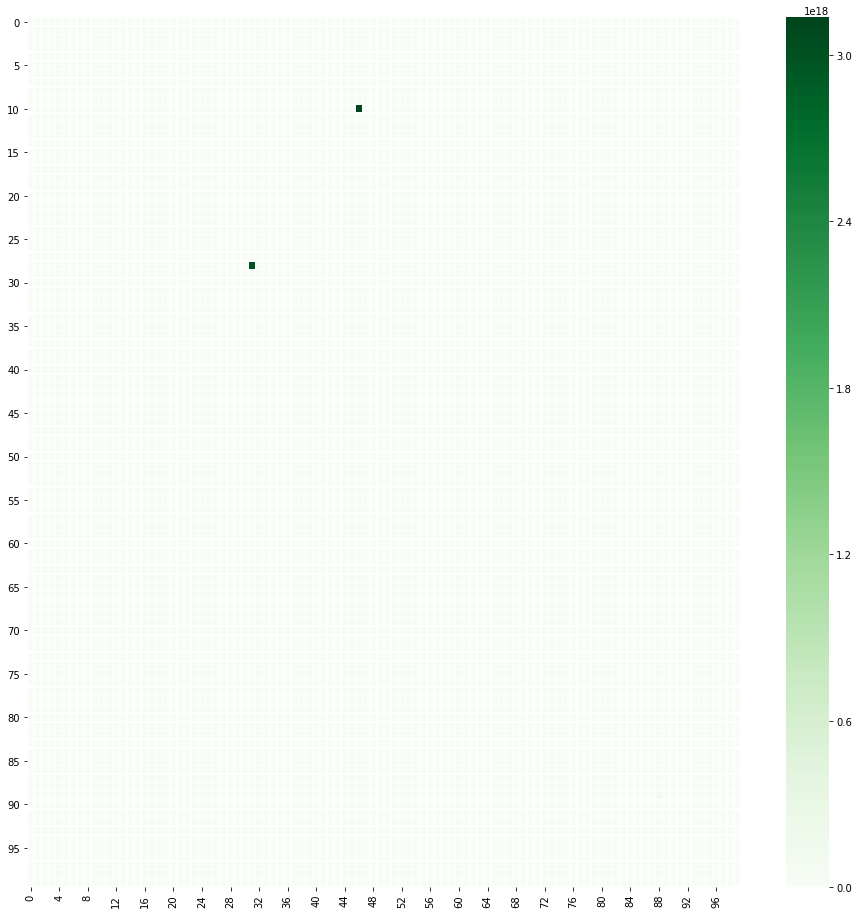

8  

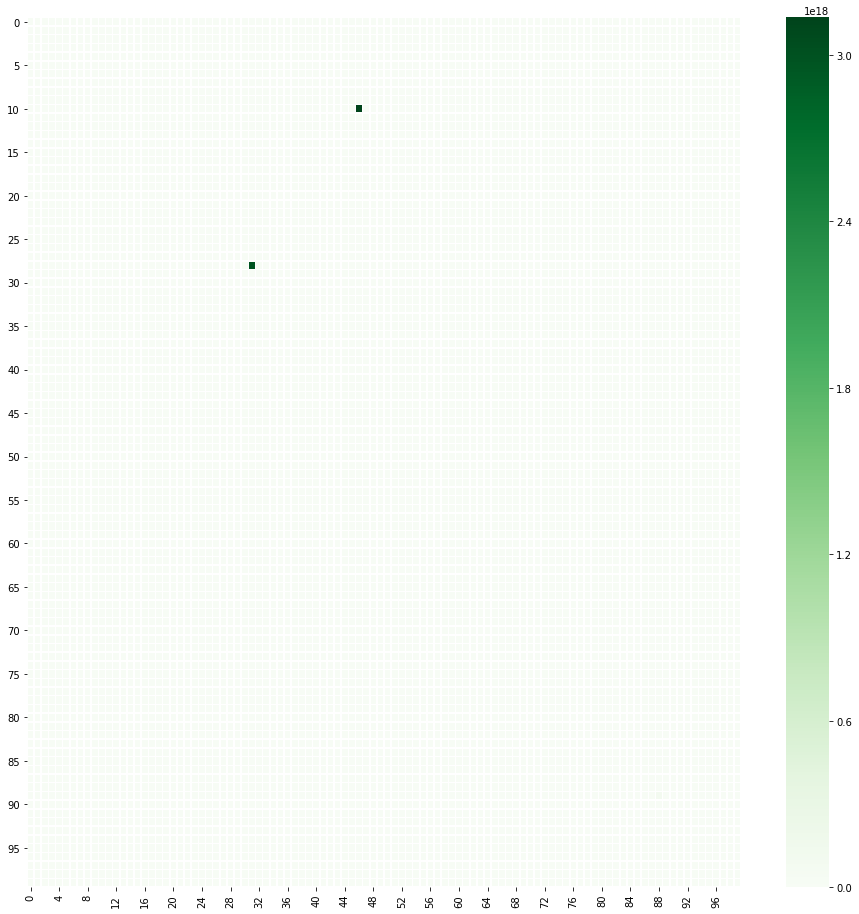

9  

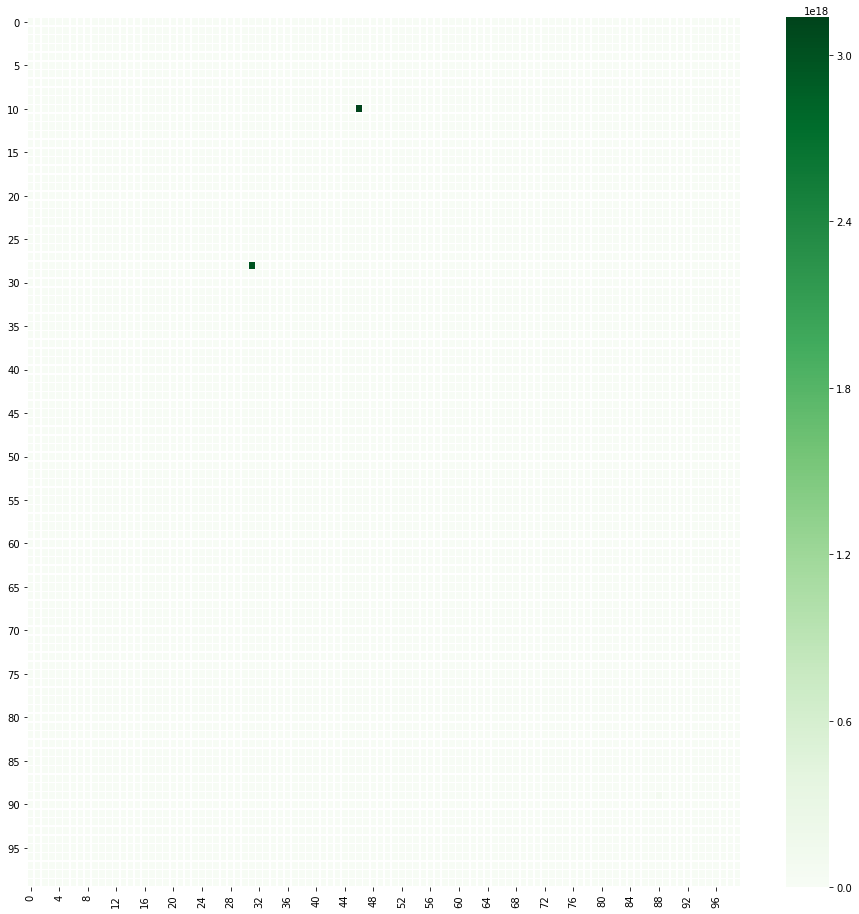

10  

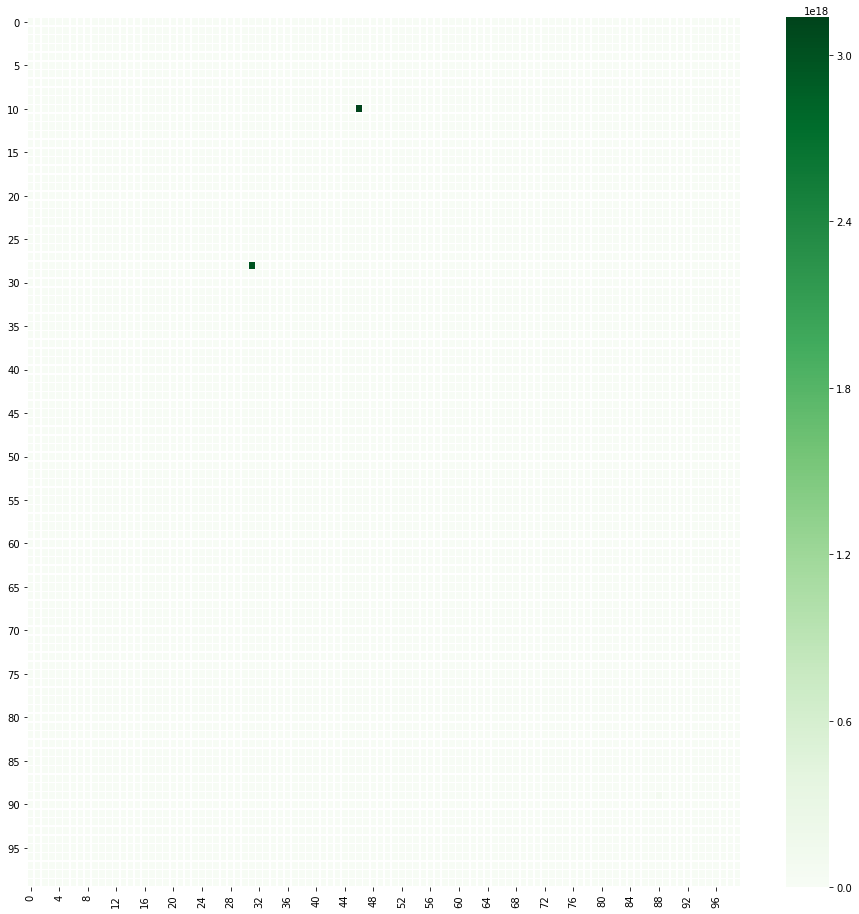

11  

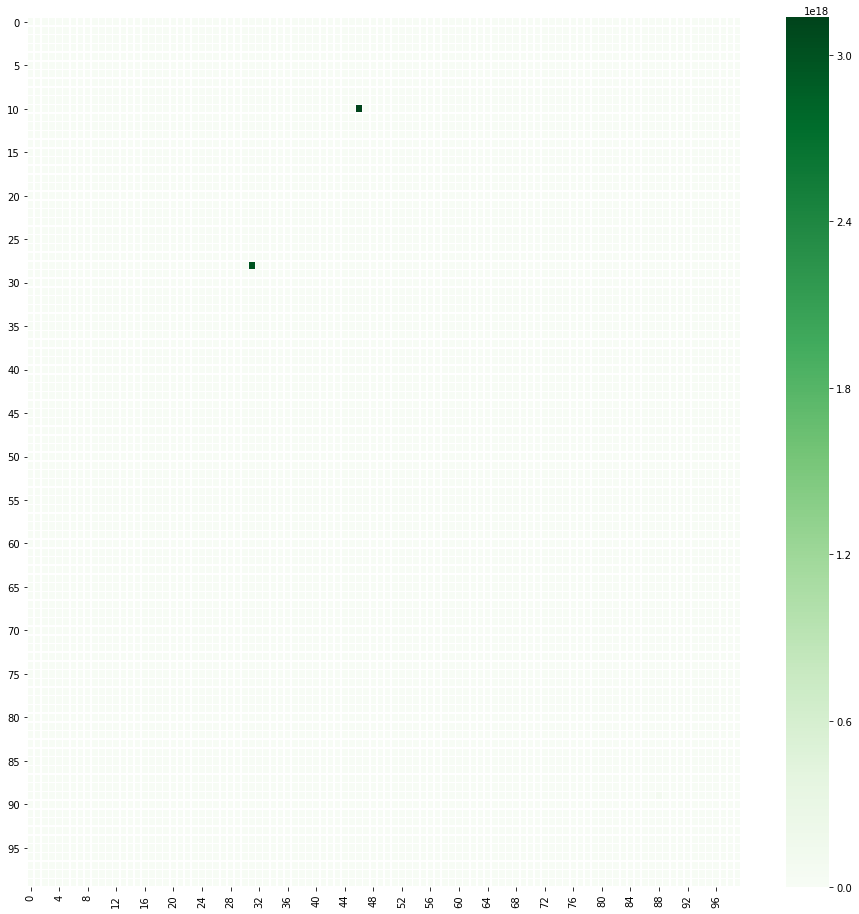

12  

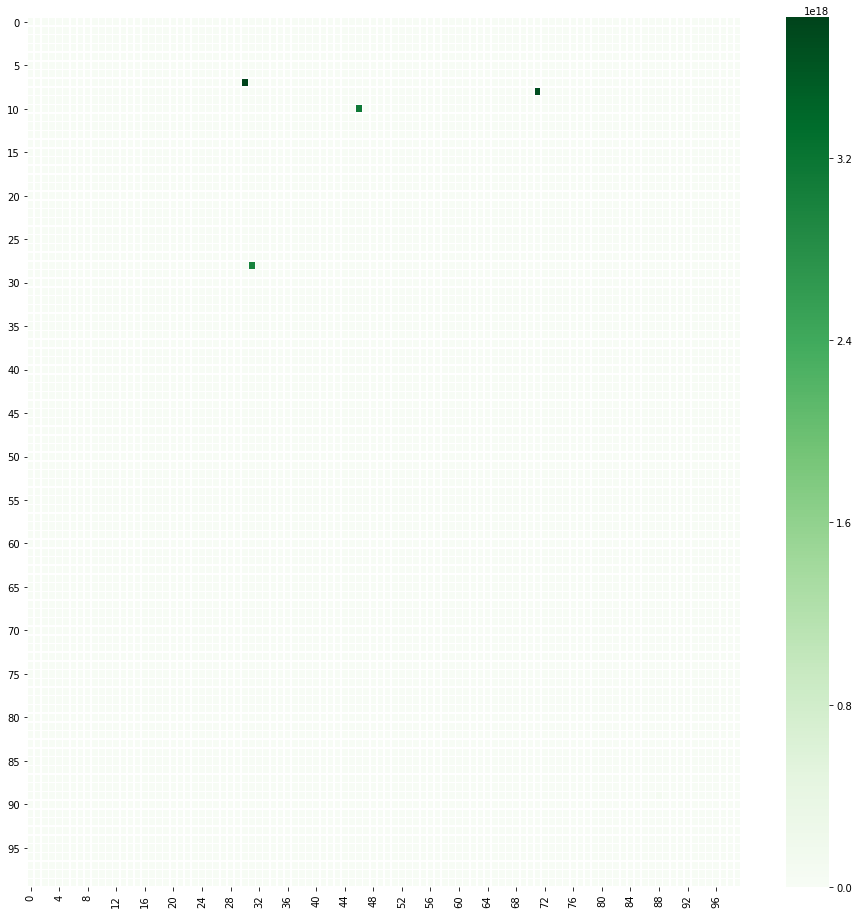

13  

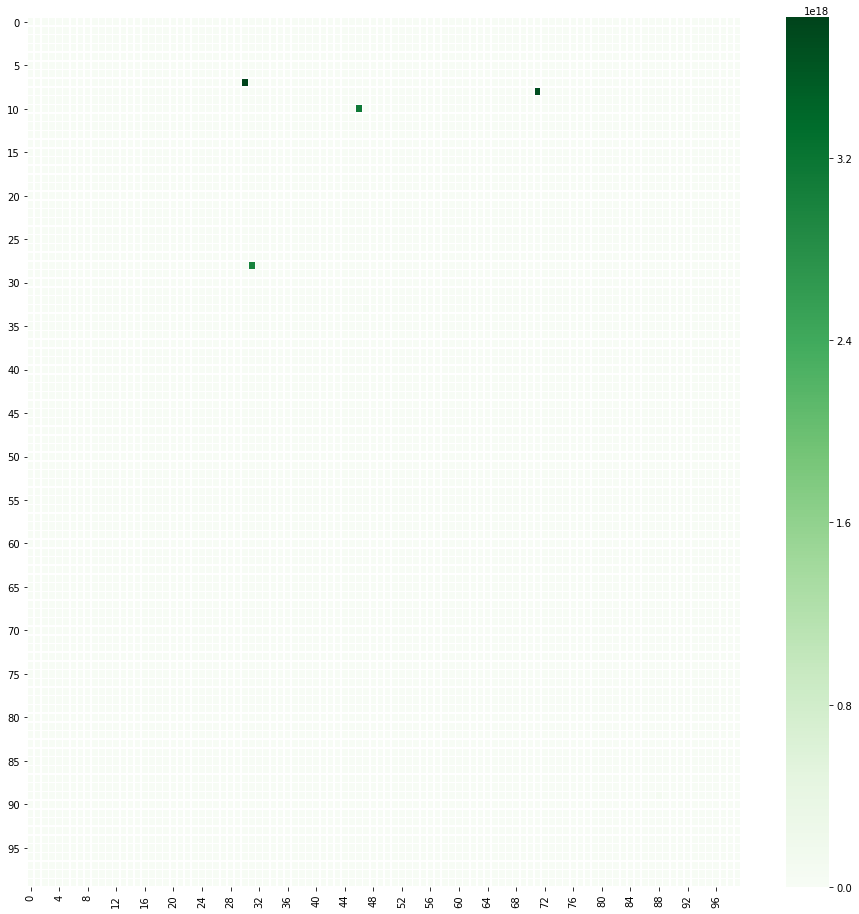

14  

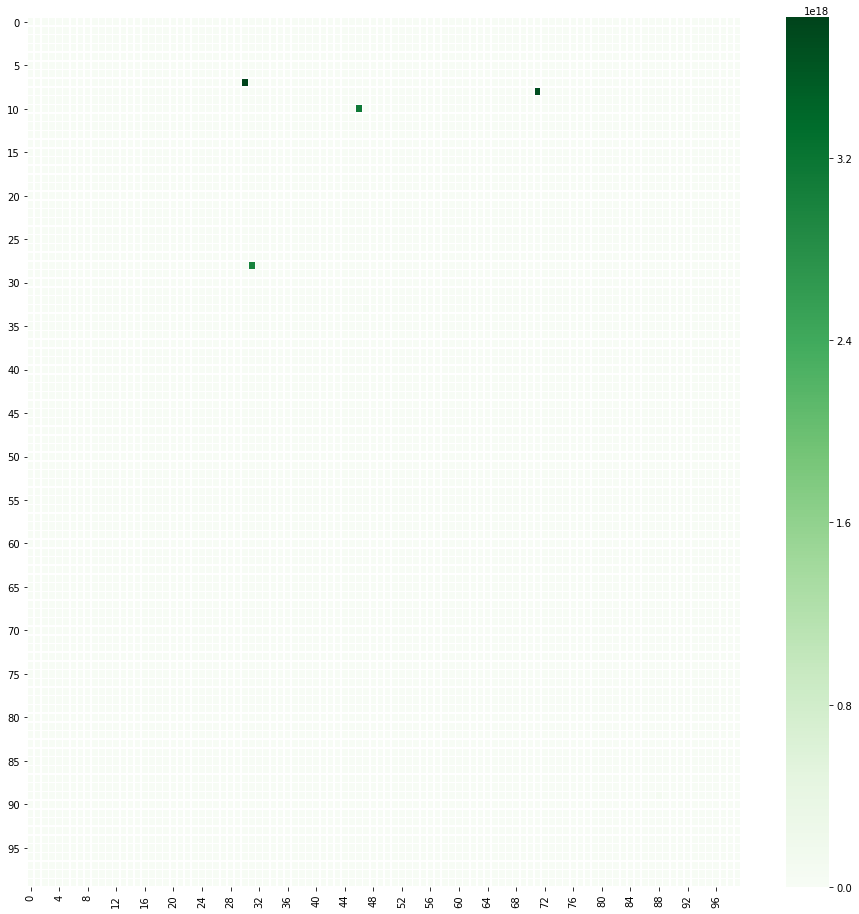

15  

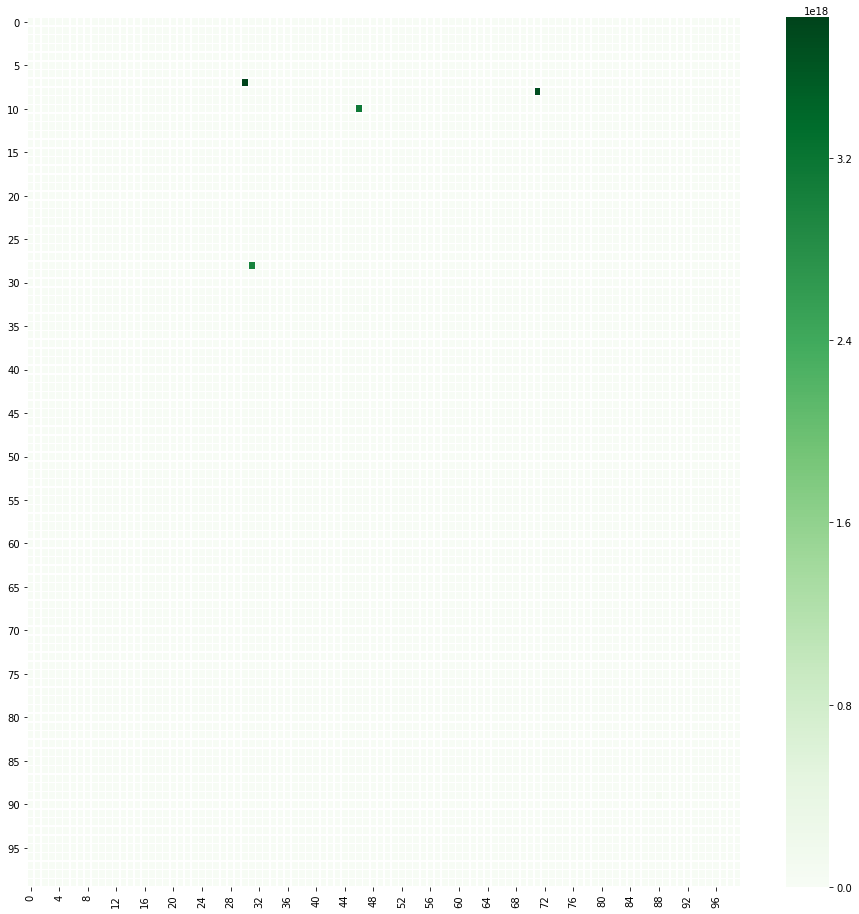

16  

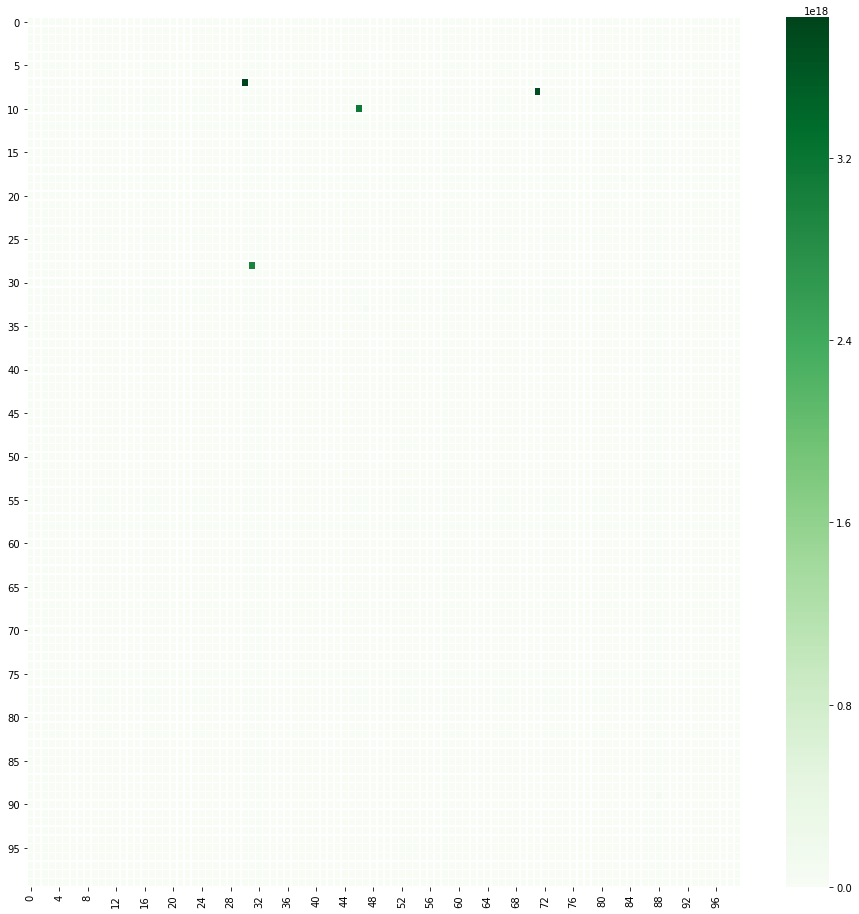

17  

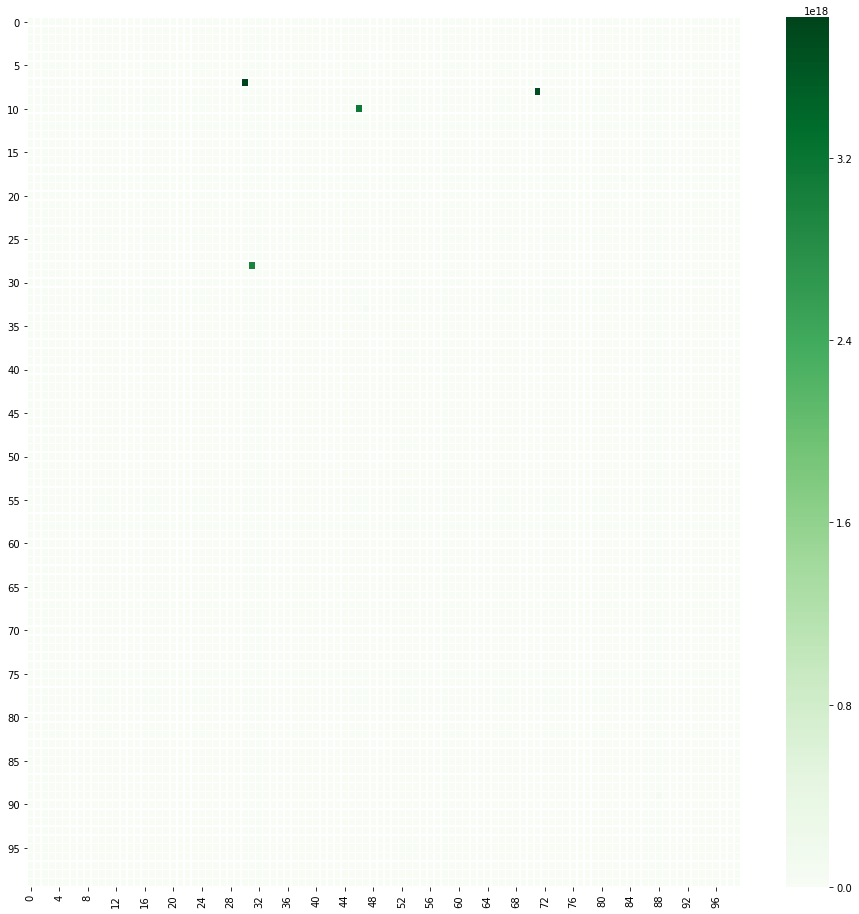

18  

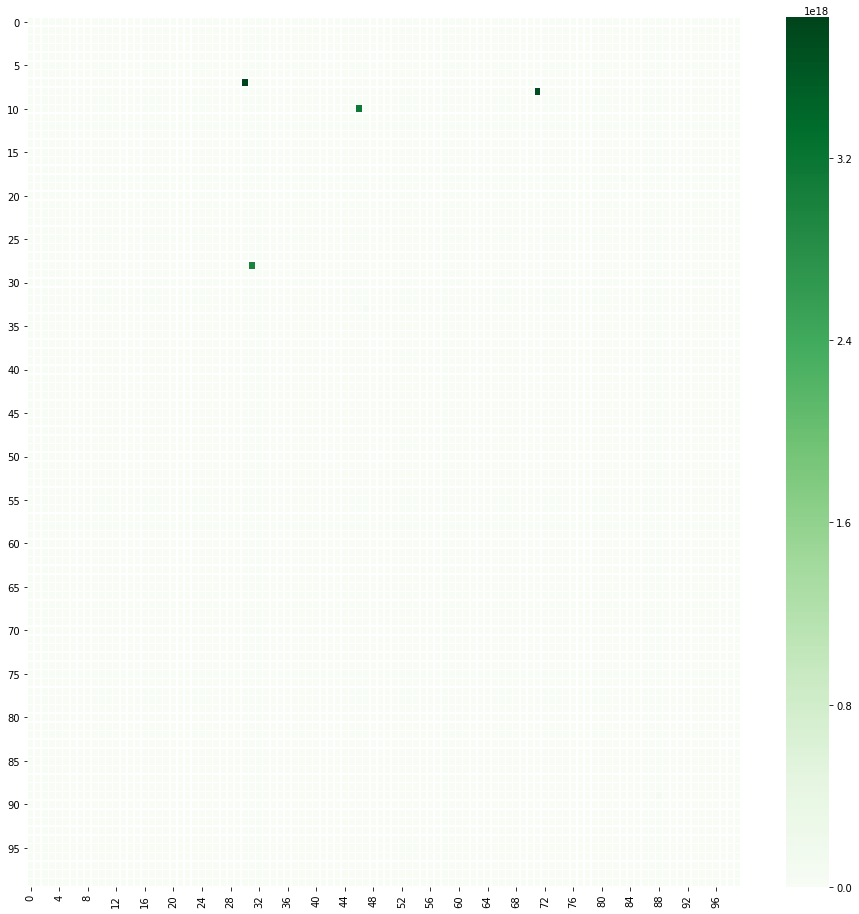

19  Finish!

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.24502270e-20
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.37802511e-17 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.07699873e-17]
 ...
 [0.00000000e+00 3.67155355e-37 5.88141112e-48 ... 0.00000000e+00
  5.61348067e-11 3.61465655e+10]
 [0.00000000e+00 6.95077432e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.32104805e+01]
 [0.00000000e+00 0.00000000e+00 5.69935392e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
--- 261.87605595588684 seconds ---


In [117]:
import time

size = 100
L = 6.66904e-05
def add_element_to_matrix(size, matrix, u, v, summ):
    if abs(u) > 3/2 or abs(v) > 3/2:
        print("Stop")
        
    if abs(u) > 1/2*L:
        #print("+")
        if u > 0:
            u = u - L
        else:
            u = u + L
        
    if abs(v) > 1/2*L:
        #print("-")
        if u > 0:
            v = v - L
        else:
            v = v + L    

    A =  int(size / 2 + int(u*size/L))
    B =  int(size / 2 + int(v*size/L))
    
    #print("\nValue: x-", u, " y-", v)
    #print("Сoordinates: x-", A, " y-", B)
    
    if abs(A) < size and abs(B) < size:
        matrix[A][B] = matrix[A][B] + summ

start_time = time.time()

matrixxx = create_matrix(size)

for k in range(2, 20):
    for b in range(0, n):
        if k!=b:
            #print("\n\n\nOur input data:\n1: x", x[k], " y", y[k])
            #print("2: x", x[b], " y", y[b])
            #print("dist between 1 and 2: \n", dif_rAB(k, b), "\n")

            #print("Velocity 2: v_x[b] ", vx," v_y[b]", vy)
            vx = v_x[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
            vy = v_y[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
            #print("Norm. velocity: v_x:", vx, " v_y:", vy)

            res_1 = np.dot(np.matrix([[vy, -vx], [vx, vy]]), dif_rAB(k, m))
            #print("Matrix Q: \n", np.matrix([[vy, -vx], [vx, vy]]))
            #print("Verification: ", vx**2 + vy**2)

            res_1 = res_1.tolist()
            f_x = res_1[0][0]
            f_y = res_1[1][0]

            #forse_from_a_to_b = np.array(grad(k, m))
            #res_2 = np.dot(matrix_inv(m), forse_from_a_to_b)

            res_2 = np.array(grad(k, b))
            #print("Forse (1 and 2): ",res_2)
            l = np.dot((res_2.T), res_2).tolist()[0]
            #print("Value of F: ", np.sqrt(l[0]))

            add_element_to_matrix(size, matrixxx, f_x, f_y , np.sqrt(l[0]))   

    ax = sns.heatmap(matrixxx, linewidth=0.5, cmap="Greens")

    plt.gcf().set_size_inches(16,16)
    plt.show()
    
    print(k, " ", end="")
    
print("Finish!\n\n", matrixx)
print("--- %s seconds ---" % (time.time() - start_time))

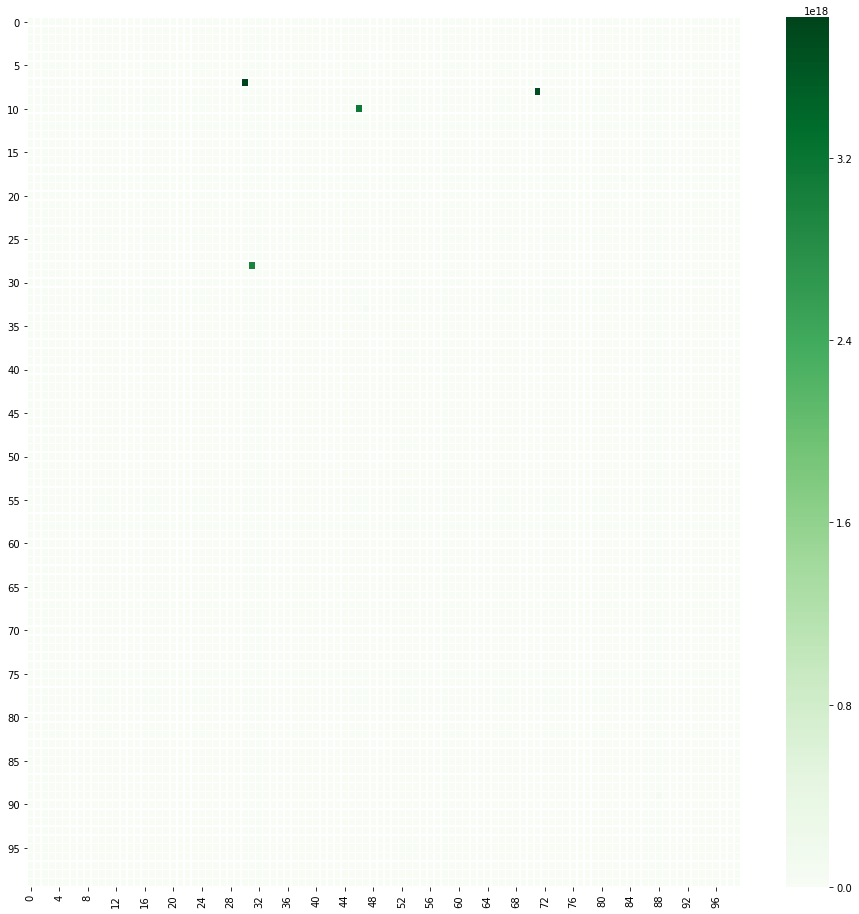

In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrixx, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(16,16)
plt.show()

Text(0.5, 1.0, '18-02-1999')

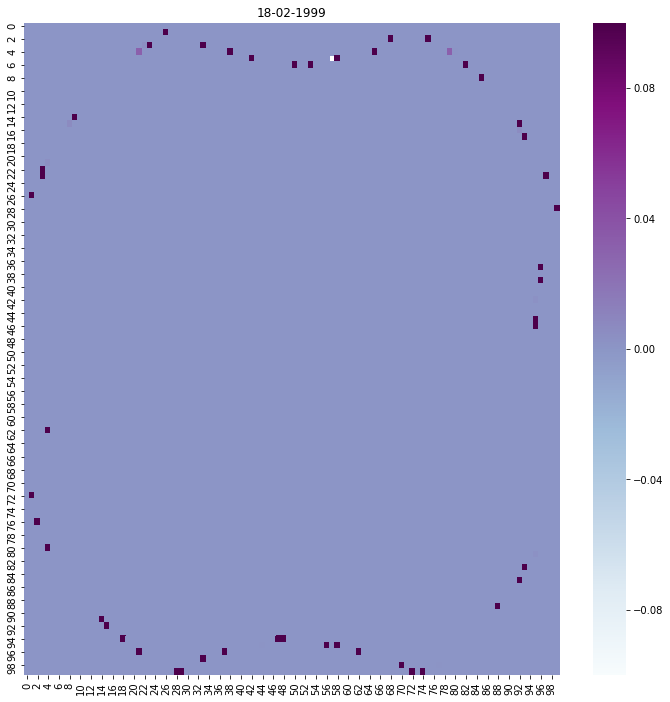

In [106]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(matrixx, cmap='BuPu')
r.set_title("18-02-1999")